<a href="https://colab.research.google.com/github/jarzolads/Prediction-of-standard-combustion-enthalpy-of-organic-compounds/blob/main/Generation_of_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install dependencies**

In [1]:
%pip install pysmiles PubChemPy rdkit

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.0 MB/s eta 0:00:00
  Created wheel for PubChemPy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13818 sha256=a57b454cccf7840a03fe8a9552b7643b67de270f52d8bd1bc95a2d799a77578c
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built PubChemPy


# **Python libraries**

In [2]:
import pysmiles as pys
import pubchempy as pubchem
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.neural_network import MLPRegressor


# **Gharagheizi Dataset**

Gharagheizi, F.; Mirkhani, S. A.; Mahyari, A. R. T. Prediction of Standard Enthalpy
of Combustion of Pure Compounds Using a Very Accurate Group-Contribution-
Based Method. Energy Fuels. 2011, 25, 3561–3566.

In [9]:
Data=pd.read_excel("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/Data_Gharagheizi.xls")

In [10]:
Data.head()

,No.,Name,Formula,CASN,State,-ΔHco (kJ/mole) [est],AD% <,Status,HC001,HC002,...,HC133,HC134,HC135,HC136,HC137,HC138,HC139,HC140,HC141,HC142
0,1,abietic acid,C20H30O2,514-10-3,gas,10960.527554,1,training,4,3,...,0,0,0,0,0,0,0,0,0,0
1,2,acenaphthene,C12H10,83-32-9,solid,6013.523824,1,training,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,acetal,C6H14O2,105-57-7,liquid,3566.534587,1,training,3,0,...,0,0,0,0,0,0,0,0,0,0
3,4,acetaldehyde,C2H4O,75-07-0,gas,1100.636618,1,training,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,acetamide,C2H5NO,60-35-5,solid,999.599324,1,training,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
"""
With this section of code we obtain the SMILES code of each component and calculate
the statistical properties of each of the graphs of the chemical compounds.
"""
SMILES=[]                                                                                  #List to save SMILES code
NAME=[]                                                                                    #List to save the molecule name
ENTALPIA=[]                                                                                #List to save the molecule enthalpy
GRAPH=[]                                                                                   #List to save the molecule graph

for i,j in zip(Data.Name[0:500],Data.iloc[0:500,5]):
  try:
    a=pubchem.get_compounds(i,"name")                                                      #Read the compound name
  except pubchem.PubChemHTTPError as e:
    print(f"Error: {e}")
    # Retry the request or handle the error gracefully
  print(i)
  for k in a:
     if k!=0:
      NAME.append(i)
      ENTALPIA.append(abs(j))
  for compounds in a:                                                                       #For each compound we read the SMILES code.
    #print(compounds.cid)
    #print(compounds.isomeric_smiles)
    #print(compounds.canonical_smiles)
    SMILES.append(compounds.isomeric_smiles)
    DEGREE=[]                                                                               #List to save the graph degree
    BET=[]                                                                                  #List to save the betweenness centrality
    DEGREE_CENT=[]                                                                          #List to save the degree centrality
    EIGENVECTOR_CENT=[]                                                                     #List to save the eigenvector centrality
    CLOSNESS_CEN=[]                                                                         #List to save the closeness centrality
    IN_DEGREE=[]                                                                            #List to save the indegree
    OUT_DEGREE=[]                                                                           #List to save the outdegree
    DISPERSION=[]                                                                           #List to save the dispersion
    ESTRADA_INDEX=[]                                                                        #List to save the Estrada index of molecules
    WIENER_INDEX=[]                                                                         #List to save the Wiener index
    GUTMAN_INDEX=[]                                                                         #List to save the Gutman index
    for n in SMILES:
      mol = pys.read_smiles(n, explicit_hydrogen=True, zero_order_bonds=True,
                            reinterpret_aromatic=True)                                      #Read the SMILES code from SMILES list
      """
      In this section we obtain the chemical graph
      """
      elements = nx.get_node_attributes(mol, name = "element")
      #nx.draw(mol, with_labels=True, labels = elements)
      #plt.savefig(n)
      """
      Here we calculate the graph statistical properties
      """
      degree=mol.degree()
      degree_cent=np.array(list(nx.degree_centrality(mol).values())).mean()
      bet=np.array(list(nx.betweenness_centrality(mol).values())).mean()
      eigenvector_cent=np.array(list(nx.eigenvector_centrality(mol, max_iter=10000).values())).mean()
      closness_cent=np.array(list(nx.closeness_centrality(mol).values())).mean()
      in_degree=np.array(list(nx.in_degree_centrality(nx.DiGraph(mol)).values())).mean()
      out_degree=np.array(list(nx.out_degree_centrality(nx.DiGraph(mol)).values())).mean()
      #dispersion=np.array(list(nx.dispersion(mol).values())).mean()
      """
      Here we calculate topological properties
      """
      estrada_ind=(nx.estrada_index(mol))
      wiener_ind=nx.wiener_index(mol)
      gutman_ind=nx.gutman_index(mol)
      """
      Here we save the statistical and topological properties of the graph
      """
      DEGREE.append(np.array(list(dict(degree).values())).mean())
      BET.append(bet)
      DEGREE_CENT.append(degree_cent)
      EIGENVECTOR_CENT.append(eigenvector_cent)
      CLOSNESS_CEN.append(closness_cent)
      IN_DEGREE.append(in_degree)
      OUT_DEGREE.append(out_degree)
      #DISPERSION.append(dispersion)
      ESTRADA_INDEX.append(estrada_ind)
      WIENER_INDEX.append(wiener_ind)
      GUTMAN_INDEX.append(gutman_ind)

"""
References
1. E. Estrada, “Characterization of 3D molecular structure”, Chem. Phys. Lett. 319, 713 (2000). https://doi.org/10.1016/S0009-2614(00)00158-5
2. M.V. Diudeaa and I. Gutman, Wiener-Type Topological Indices, Croatica Chemica Acta, 71 (1998), 21-51. https://hrcak.srce.hr/132323
3. I. Gutman, Selected properties of the Schultz molecular topological index, J. Chem. Inf. Comput. Sci. 34 (1994), 1087–1089. https://doi.org/10.1021/ci00021a009
"""

In [ ]:
"""
Here we construct the data set of statistical and topological properties of molecular graphs.
"""
pd.set_option("display.max_rows",None)
New=pd.DataFrame()
New["Name"]=NAME
New["SMILES"]=SMILES
#New["N1"]=(New["Eigen"]*New["Closs"])/New["Degree"]
#New["Indegree"]=IN_DEGREE
#New["Outdegree"]=OUT_DEGREE
New["Degree"]=DEGREE
New["Bet"]=BET
New["Eigen"]=EIGENVECTOR_CENT
New["Closs"]=CLOSNESS_CEN
New["ESTRADA"]=ESTRADA_INDEX
New["WIENER"]=WIENER_INDEX
New["GUTMAN"]=GUTMAN_INDEX
New["Entalpia"]=ENTALPIA
pd.to_csv("All.csv")

In [ ]:
New

,Name,SMILES,Degree,Bet,Eigen,Closs,ESTRADA,WIENER,GUTMAN,Entalpia
0,Bicyclo(1.1.0)butane-1-carboxcylic acid methyl...,COC(=O)C12CC1C2,2.125000,0.163690,0.186365,0.316609,46.296519,395.0,1405.0,3163.60
1,Bicyclopentyl,C1CCC(C1)C2CCCC2,2.071429,0.106024,0.163115,0.273912,72.589646,1420.0,4963.0,4079.56
2,Bicyclo[1.1.0]butane,C1C2C1C2,2.200000,0.152778,0.274905,0.472890,31.716409,100.0,343.0,2648.70
3,Bicyclopropyl,C1CC1C2CC2,2.125000,0.138095,0.217040,0.353524,46.142260,352.0,1219.0,3699.40
4,Bicyclo[2.2.2]oct-2-ene,C1CC2CCC1C=C2,2.100000,0.110526,0.197371,0.344205,51.823767,568.0,1975.0,4619.30
5,Bicyclohexyl,C1CCC(CC1)C2CCCCC2,2.058824,0.100490,0.147240,0.243813,87.434950,2365.0,8359.0,7166.10
6,Bicycloheptyl,C1CCCC(CC1)C2CCCCCC2,2.050000,0.093050,0.134795,0.226176,102.454690,3538.0,12571.0,8455.18
7,Bicyclo[2.2.1]hept-2-ene,C1CC2CC1C=C2,2.117647,0.116176,0.213819,0.377170,44.503165,373.0,1292.0,4051.44
8,5-ethenylbicyclo[2.2.1]hept-2-ene,C=CC1CC2CC1C=C2,2.095238,0.119549,0.182589,0.317882,54.090994,687.0,2392.0,5162.34
9,5-ethylidenebicyclo[2.2.1]hept-2-ene,C/C=C/1\CC2CC1C=C2,2.095238,0.125564,0.181048,0.306721,54.021368,711.0,2504.0,5123.21


In [15]:
All=pd.read_csv("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/All.csv")
All.head()

,Name,SMILES,Estado,Degree,Bet,Eigen,Closs,Estrada,Wiener,Gutman,Enthalpy
0,abietic acid,CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...,1,2.076923,0.087089,0.106051,0.193297,133.219993,7100,26048,10960.527550
1,acenaphthene,C1CC2=CC=CC3=C2C1=CC=C3,2,2.181818,0.123160,0.187248,0.297329,56.953140,800,3203,6013.523824
2,acetal,CCOC(C)OCC,3,1.909091,0.154329,0.187516,0.253346,52.650084,944,2873,3566.534587
3,acetaldehyde,CC=O,1,1.714286,0.200000,0.350527,0.522632,15.326358,42,90,1100.636618
4,acetamide,CC(=O)N,2,1.777778,0.198413,0.304505,0.436147,20.109140,86,208,999.599324


# **Molecular descriptors dataset**

In [16]:
"""
In this section we obtain the 210 molecular descriptors from RDKit of the 3477 organic compounds
"""
from rdkit.Chem import AllChem as Chem, Descriptors
import pandas as pd

rdkit_smiles=[]
for i in All["SMILES"]:
  m = Chem.MolFromSmiles(i)
  rdkit_smiles.append(m)

In [17]:
descrs = [Descriptors.CalcMolDescriptors(i) for i in rdkit_smiles]
pd.set_option("display.max_columns",None)
df = pd.DataFrame(descrs)

In [18]:
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHDonors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumSpiroAtoms,NumUnspecifiedAtomStereoCenters,Phi,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.942019,11.942019,0.161193,-0.588430,0.760294,41.318182,302.458,272.218,302.224580,122,0,0.309162,-0.480821,0.480821,0.309162,1.318182,2.045455,2.681818,16.368066,9.466281,2.566165,-2.566050,2.615592,-2.525172,5.747704,-0.162006,2.459139,1.998747,541.910498,16.120956,14.484854,14.484854,10.287365,8.927238,8.927238,8.539618,8.539618,7.068273,7.068273,5.600576,5.600576,-1.05,80295.797539,15.830858,5.247258,2.177741,134.232208,5.106527,0.000000,0.000000,0.00000,0.0,5.969305,4.794537,0.000000,0.0,0.0,44.917178,67.769658,0.000000,5.414990,9.901065,5.969305,0.0,0.0,28.583699,66.219879,0.000000,23.298249,0.0,0.0,0.000000,0.0,0.0,0.0,11.075833,4.794537,28.583699,66.219879,23.298249,0.0,0.000000,0.0,37.30,11.384296,9.901065,0.0,11.332897,11.835812,19.262465,24.835569,5.573105,6.923737,32.923252,0.000000,0.000000,0.0,11.942019,9.829133,2.690411,0.888187,0.000000,11.217031,8.933220,0.000000,0.750000,22,1,2,3,0,3,0,0,0,0,4,0,1,1,2,0,2,1,0,1,0,0,3.775845,3,5.2062,89.5358,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.248843,2.248843,1.232824,1.232824,0.546961,14.000000,154.212,144.132,154.078250,58,0,-0.011958,-0.061355,0.061355,0.011958,0.750000,1.333333,1.916667,14.157145,10.058216,2.113963,-1.988273,2.294018,-1.757298,5.900872,1.024073,2.523579,2.580406,401.

In [19]:
df["Name"]=All["Name"]
df["SMILES"]=All["SMILES"]
df["Entalpia"]=All["Enthalpy"]
df.to_csv("All_molecularDescriptors.csv")

/usr/local/lib/python3.11/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


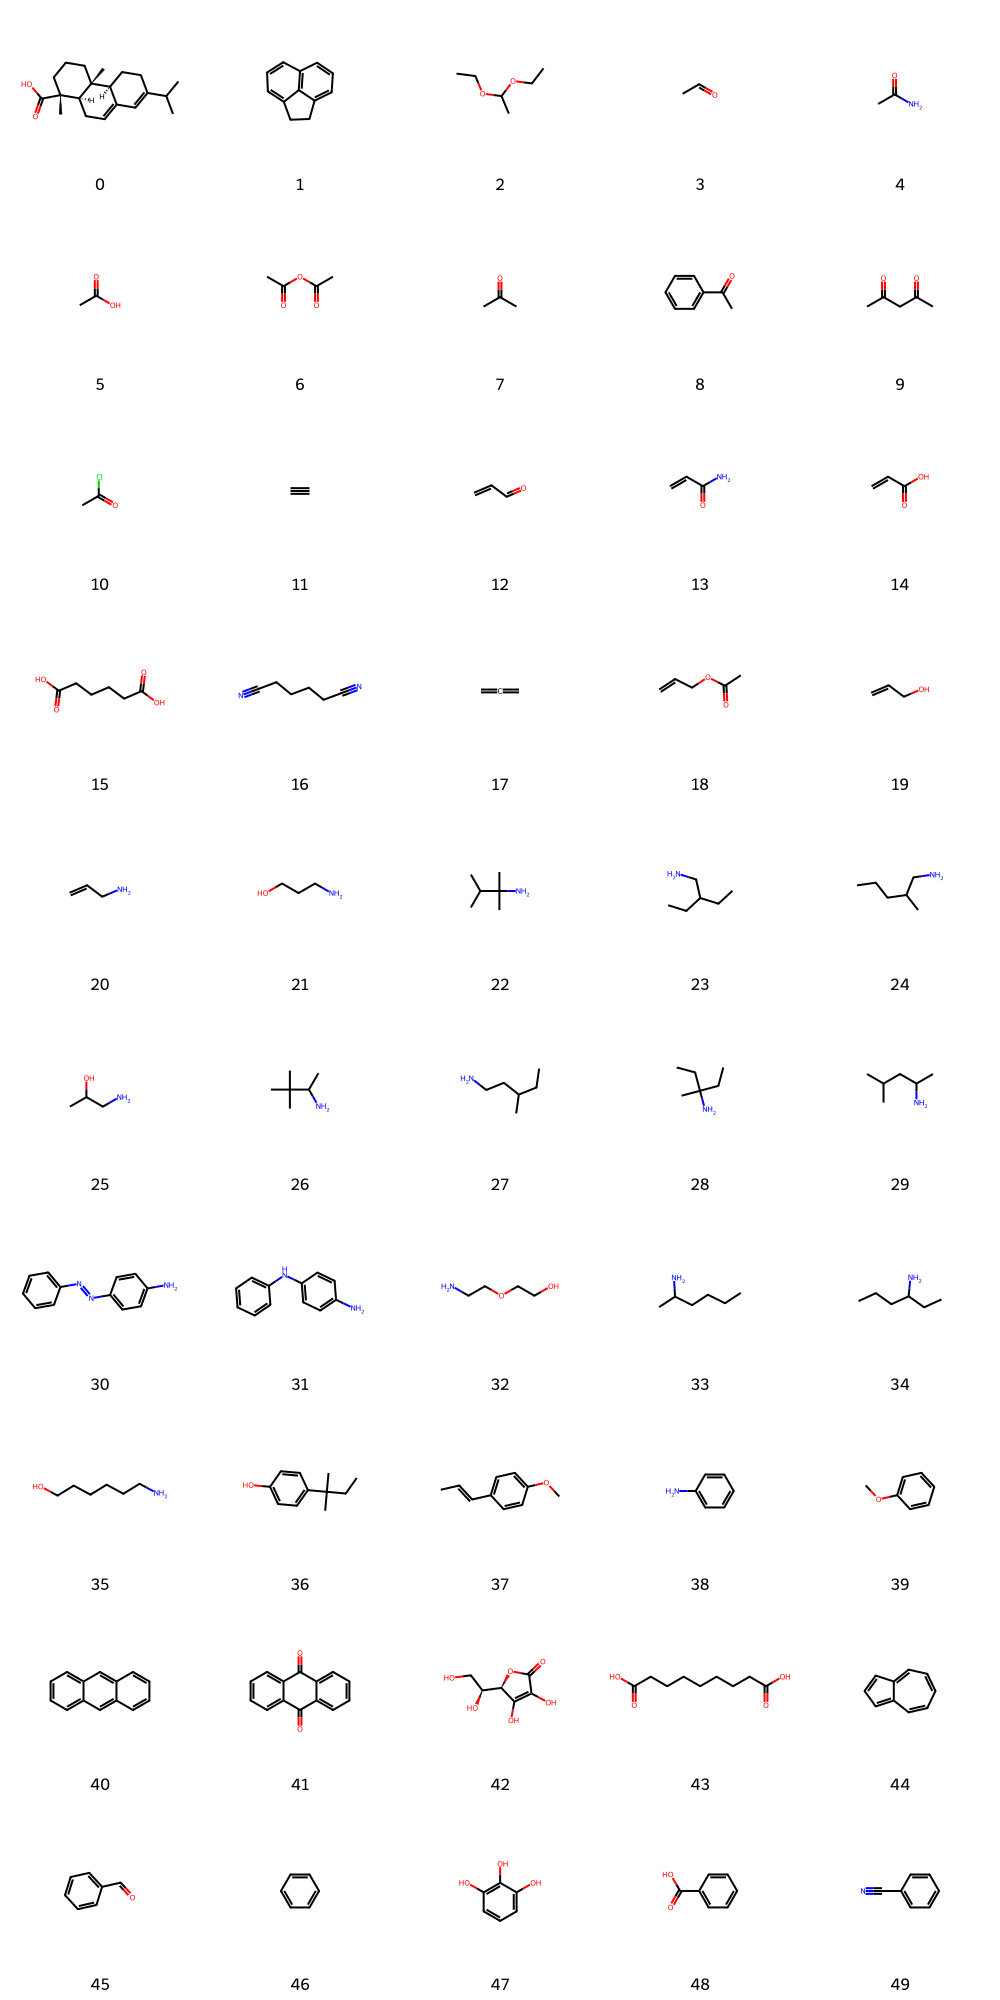

In [20]:
Draw.MolsToGridImage(rdkit_smiles, molsPerRow=5, legends=[str(i) for i in range(len(rdkit_smiles))])

In [22]:
Data1=pd.read_excel("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/Data_Gharagheizi.xls")

In [23]:
Data2=pd.read_csv("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/All.csv")

In [25]:
STATE=[]
for i,j in zip(Data1["Name"],Data1["State"]):
  for k in Data2["Name"]:
    if i==k:
      STATE.append(j)

In [26]:
TIPO=[]
for i in STATE:
  if i=="gas":
    TIPO.append(1)
  elif i=="solid":
    TIPO.append(2)
  else:
    TIPO.append(3)

ESTADO=pd.Series(TIPO)

In [27]:
ESTADO.to_csv("ESTADO.csv")

# **Preprocessed dataset**

In [29]:
"""
In this section we obtain the dataset that will be used to train the ML models.
"""
data_graphs=pd.read_csv("/content/drive/MyDrive/Artículo Fernanda Saviñón/Archivos csv/All.csv")
pd.set_option("display.max_rows",None)
data_graphs

,Name,SMILES,Estado,Degree,Bet,Eigen,Closs,Estrada,Wiener,Gutman,Enthalpy
0,abietic acid,CC(C)C1=CC2=CC[C@@H]3[C@@]([C@H]2CC1)(CCC[C@@]...,1,2.076923,0.087089,0.106051,0.193297,133.219993,7100,26048,10960.527550
1,acenaphthene,C1CC2=CC=CC3=C2C1=CC=C3,2,2.181818,0.123160,0.187248,0.297329,56.953140,800,3203,6013.523824
2,acetal,CCOC(C)OCC,3,1.909091,0.154329,0.187516,0.253346,52.650084,944,2873,3566.534587
3,acetaldehyde,CC=O,1,1.714286,0.200000,0.350527,0.522632,15.326358,42,90,1100.636618
4,acetamide,CC(=O)N,2,1.777778,0.198413,0.304505,0.436147,20.109140,86,208,999.599324
5,acetic acid,CC(=O)O,3,1.750000,0.208333,0.322849,0.464973,17.616006,63,147,823.119008
6,acetic anhydride,CC(=O)OC(=O)C,3,1.846154,0.202797,0.256429,0.320157,29.876568,252,708,1681.272860
7,acetone,CC(=O)C,3,1.800000,0.183333,0.289195,0.421013,22.825666,111,273,1657.438881
8,acetophenone,CC(=O)C1=CC=CC=C1,3,2.000000,0.158824,0.217637,0.305992,40.997803,460,1531,3984.286528
9,acetylacetone,CC(=O)CC(=O)C,3,1.866667,0.169231,0.229787,0.323994,35.127916,336,938,2516.147699
